## Exericise 11

### Introduction

The aim of this exercise is to fit a linear function $f(x)=2x+1$ using a single neuron neural network.
At first, the dataset for training and testing are created:
1. *training set*: measures used to train the model and optimize regression parameters. Points in this set are obtained by adding a gaussian noise to the linear target function,
2. *validation set* (10% of the training set): to test the model accuracy on a separate set not involved in the training process. Like the training set, this is evaluated from linear target function + gaussian noise with same $\sigma$ as in the training set,
3. *target set*: the actual target function without the gaussian noise. The model accuracy is evaluated on this set as well.

The following graph reports the three dataset as an example, using 100 points for the training set, 10 points for the validation and target set (the latter is represented as a straight line, the other two as scatterplots).

In [2]:
### builiding training and validation sets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [5]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

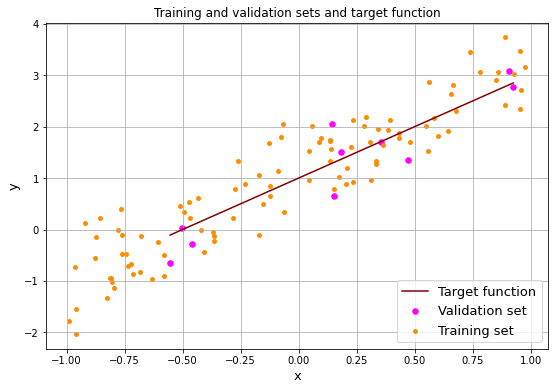

In [6]:
# plot training and target dataset (sigma = 0.5)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(x_valid, y_target, color = "maroon", label = "Target function")
plt.scatter(x_valid, y_valid, color='magenta', s=30, label="Validation set")
plt.scatter(x_train, y_train, color = "darkorange", s=15, label="Training set")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Training and validation sets and target function")
plt.legend(loc="lower right", fontsize=13)
plt.grid(True); plt.show()

### 10.1
This first part of Lecture 11 focuses on three parameters: $N_{train}$ (the training set size), $\sigma$ (the gaussian noise standard deviation applied on the training and validation sets), $N_{epochs}$ (an epoch is a single run of the NN during the training phase). The mean sqaured error was used as loss function in the whole exercise.

At first these parameters were set to: $N_{train} = 100$, $\sigma=0$, $N_{epochs}=30$. With this parameters setting, the loss function evaluated on the validation set resulted to be $\approx 0.3$. After that, the training set size $N_{train}$, $\sigma$ and the number of epochs $N_{epochs}$ were varied to see how the model is related to these parameters and to improve the fitting. The script was simply run several times varying manually $N_{train}$, $\sigma$ and $N_{epochs}$ to find the best combination of the three parameters.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
### plot results
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(7,4))
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlabel("x",size=12)
plt.ylabel("y",size=12)
plt.title("Predictions vs target function")
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

In [3]:
#compose the NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
## one layer with one input
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
loss_valid = []
loss_target = []
acc_target = []
acc_valid = []

In [31]:
np.random.seed(0)
##  con epoche 100, sigma = 0.3 aumento n train= 200, 500, 1000
# generate training inputs
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
    
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
#evaluate the model
score = model.evaluate(x_valid, y_valid, batch_size=320, verbose=1)[0]
loss_valid.append(score)
acc = model.evaluate(x_valid, y_valid, batch_size=320, verbose=1)[1]
acc_valid.append(acc)
score2 = model.evaluate(x_valid, y_target, batch_size=320, verbose=1)[0]
loss_target.append(score2)
acc2 = model.evaluate(x_valid, y_target, batch_size=320, verbose=1)[1]
acc_target.append(acc2)

Train on 1000 samples, validate on 10 samples
Epoch 1/100
1000/1000 [==============================] - 0s 286us/sample - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 2/100
1000/1000 [==============================] - 0s 177us/sample - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 3/100
1000/1000 [==============================] - 0s 228us/sample - loss: 0.0843 - mse: 0.0843 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 4/100
1000/1000 [==============================] - 0s 234us/sample - loss: 0.0843 - mse: 0.0843 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 5/100
1000/1000 [==============================] - 0s 224us/sample - loss: 0.0843 - mse: 0.0843 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 6/100
1000/1000 [==============================] - 0s 206us/sample - loss: 0.0842 - mse: 0.0842 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 7/100
1000/1000 [==============================] - 0s 238us/sample - loss: 0.0842 - mse: 0.0842 - val_loss: 0.0635

In [25]:
loss_valid

[0.07292686402797699, 0.07409688830375671]

In [20]:
loss_target

[0.02578430436551571,
 0.002021215856075287,
 0.006529194302856922,
 0.01594807207584381]

In [21]:
## n train = 100, nepochs = 30
sigma = [0.1, 0.3, 0.5, 0.7]
for s, l1, a1, l2, a2 in zip(sigma, loss_valid, acc_valid, loss_target, acc_target):
    print("sigma: ",  s )
    print("loss on validation set: " , l1, "accuracy on validation set: ", a1)
    print("loss on target: " , l2, "accuracy on target: ", a2)

sigma:  0.1
loss on validation set:  0.037161387503147125 accuracy on validation set:  0.037161388
loss on target:  0.02578430436551571 accuracy on target:  0.025784304
sigma:  0.3
loss on validation set:  0.07512789964675903 accuracy on validation set:  0.0751279
loss on target:  0.002021215856075287 accuracy on target:  0.0020212159
sigma:  0.5
loss on validation set:  0.20996849238872528 accuracy on validation set:  0.20996849
loss on target:  0.006529194302856922 accuracy on target:  0.0065291943
sigma:  0.7
loss on validation set:  0.3987550735473633 accuracy on validation set:  0.39875507
loss on target:  0.01594807207584381 accuracy on target:  0.015948072


In [27]:
# ntrain = 100, sigma = 0.3
ep = [40, 60, 100]
for e, l1, a1, l2, a2 in zip(ep, loss_valid, acc_valid, loss_target, acc_target):
    print("n_epochs: ",  e )
    print("loss on validation set: " , l1, "accuracy on validation set: ", a1)
    print("loss on target: " , l2, "accuracy on target: ", a2)

n_epochs:  40
loss on validation set:  0.07292686402797699 accuracy on validation set:  0.072926864
loss on target:  0.004748870152980089 accuracy on target:  0.00474887
n_epochs:  60
loss on validation set:  0.07409688830375671 accuracy on validation set:  0.07409689
loss on target:  0.004231270402669907 accuracy on target:  0.0042312704
n_epochs:  100
loss on validation set:  0.07112022489309311 accuracy on validation set:  0.071120225
loss on target:  0.002529656747356057 accuracy on target:  0.0025296567


In [33]:
# nepoche = 100, sigma = 0.3
ntrain = [200, 500, 1000]
for e, l1, a1, l2, a2 in zip(ntrain, loss_valid, acc_valid, loss_target, acc_target):
    print("n_train: ",  e )
    print("loss on validation set: " , l1, "accuracy on validation set: ", a1)
    print("loss on target: " , l2, "accuracy on target: ", a2)

n_train:  200
loss on validation set:  0.027798552066087723 accuracy on validation set:  0.027798552
loss on target:  0.0010142800165340304 accuracy on target:  0.00101428
n_train:  500
loss on validation set:  0.16937372088432312 accuracy on validation set:  0.16937372
loss on target:  0.0011597723932936788 accuracy on target:  0.0011597724
n_train:  1000
loss on validation set:  0.06456464529037476 accuracy on validation set:  0.064564645
loss on target:  0.00012937412247993052 accuracy on target:  0.00012937412


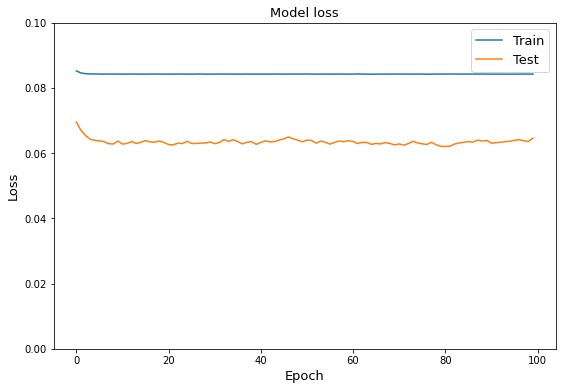

In [41]:
##-> 100 epoche, sigma 0.3,  ntrain = 200

plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',size=13)
plt.ylabel('Loss',size=13)
plt.xlabel('Epoch',size=13)
plt.ylim(0.,0.1)
plt.legend(['Train', 'Test'], loc='best',fontsize=13)
plt.show()

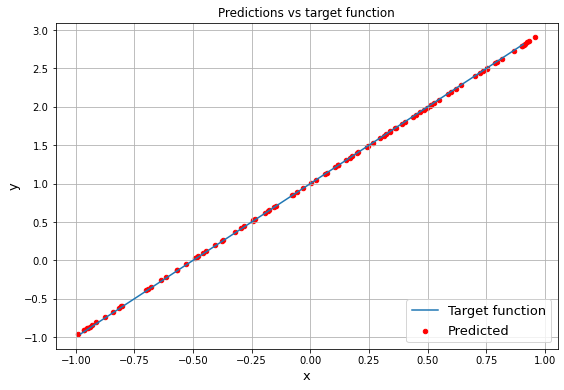

In [42]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(9,6))
plt.scatter(x_predicted, y_predicted, color = "r",s=20, label = "Predicted")
plt.plot(x_valid, y_target, label = "Target function")
plt.xlabel("x",size=13)
plt.ylabel("y",size=13)
plt.title("Predictions vs target function")
plt.legend(loc="lower right", fontsize=13)
plt.grid(True); plt.show()